In [53]:
import pandas as pd
import numpy as np

In [54]:
df=pd.read_csv("fashion-mnist_train.csv")

In [55]:
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
images=df.iloc[:,1:].to_numpy()

In [57]:
label=df.iloc[:,:1].to_numpy()

In [58]:
images=images.reshape([-1,28,28,1])

In [59]:
images[0]

array([[[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
      

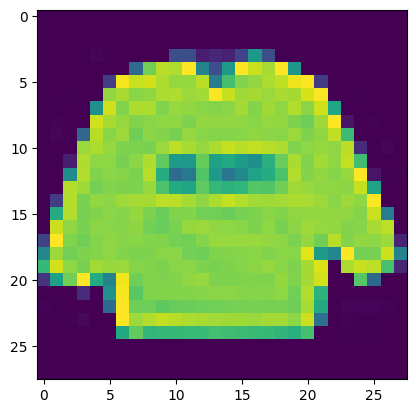

In [60]:
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(images[0])
plt.show()

In [61]:
from sklearn.model_selection import train_test_split

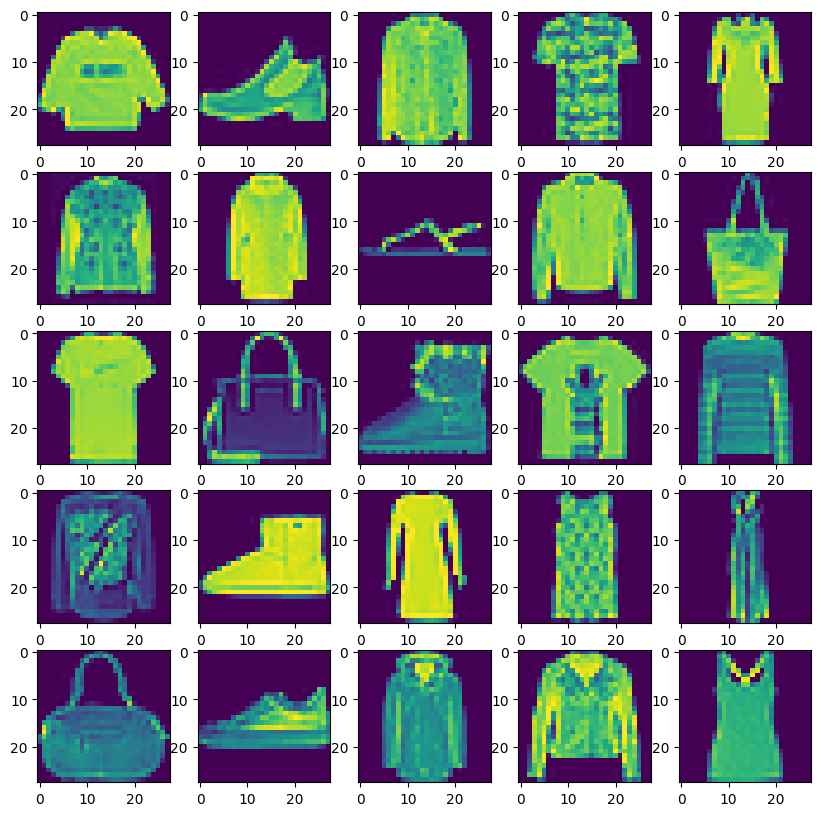

In [62]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(images[i])
plt.show()

In [63]:


from keras.models import Sequential
from keras.layers import Dense,Flatten,Softmax

In [64]:
model=Sequential([
    Flatten(input_shape=(28,28)),
    Dense(128,activation="relu"),
    Dense(10)
])

In [65]:
import tensorflow as tf

In [66]:
model.compile(optimizer="adam",loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=["accuracy"])

In [67]:
model.fit(images,label,epochs=30)

Epoch 1/30
1875/1875 [==============================] - 6s 2ms/step - loss: 4.3243 - accuracy: 0.6845
Epoch 2/30
1875/1875 [==============================] - 3s 1ms/step - loss: 0.7143 - accuracy: 0.7199
Epoch 3/30
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6429 - accuracy: 0.7612
Epoch 4/30
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5772 - accuracy: 0.7945
Epoch 5/30
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5339 - accuracy: 0.8198
Epoch 6/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5099 - accuracy: 0.8277
Epoch 7/30
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5010 - accuracy: 0.8336
Epoch 8/30
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4910 - accuracy: 0.8388
Epoch 9/30
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4841 - accuracy: 0.8400
Epoch 10/30
1875/1875 [==============================] - 3s 1ms/step - loss: 0.479

In [68]:
test_df=pd.read_csv("fashion-mnist_test.csv")

In [69]:
test_images=test_df.iloc[:,1:].to_numpy()

In [70]:
test_images=test_images.reshape([-1,28,28,1])

In [71]:
predicted=model.predict(test_images)

313/313 [==============================] - 0s 944us/step


In [72]:
predicted

array([[ 4.2617313e+01,  3.3816765e+01,  3.1487335e+01, ...,
        -3.1953082e+02,  2.9274864e+01, -1.5164600e+01],
       [-8.1433090e+01,  1.6137001e+02, -1.2502674e+02, ...,
        -3.1870203e+02, -8.2009804e+01, -5.4289893e+02],
       [ 1.0005275e-01, -2.1043746e+00,  2.8049066e+00, ...,
        -1.4521321e+00, -4.6625158e-01, -3.2712462e+00],
       ...,
       [ 3.0680048e+02,  5.1057381e+01, -6.3410046e+02, ...,
         2.8957654e+02,  4.3789343e+02, -4.7149837e+01],
       [ 2.6725868e+01,  1.2690531e+01,  2.3261837e+01, ...,
         7.9129715e+00,  3.1390833e+01,  1.0842198e+01],
       [ 1.9782423e+01,  2.4694468e+01,  1.8206856e+01, ...,
        -8.2547653e+01,  1.4060655e+01, -8.1926170e+01]], dtype=float32)

In [73]:
probability=Sequential([model,Softmax()])

In [74]:
predict=probability.predict(test_images)

313/313 [==============================] - 0s 889us/step


In [75]:
predict[0]

array([8.0132902e-01, 1.2072055e-04, 1.1752298e-05, 3.5308916e-04,
       1.4310027e-07, 2.9755912e-14, 1.9818401e-01, 0.0000000e+00,
       1.2860529e-06, 6.4482908e-26], dtype=float32)

In [76]:
np.argmax(predict[0])

0

In [77]:
test_lables=test_df.iloc[:,:1].to_numpy()

In [78]:
test_lables

array([[0],
       [1],
       [2],
       ...,
       [8],
       [8],
       [1]], dtype=int64)

In [79]:
test_lables[0]

array([0], dtype=int64)

In [80]:
np.argmax(predict[20])

4

In [82]:
test_lables[20]

array([4], dtype=int64)

In [83]:
(train_images,train_labels),(test_images,test_labels)=tf.keras.datasets.fashion_mnist.load_data()

In [85]:
train_images=train_images/255.0
test_images=train_images/255.0

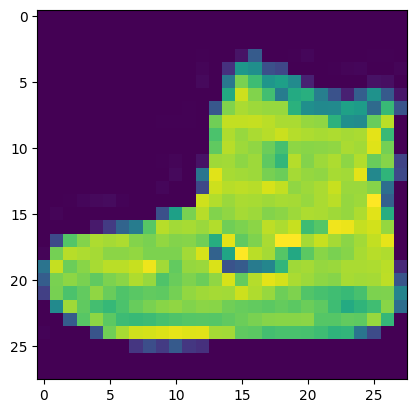

In [87]:
plt.figure()
plt.imshow(train_images[0])
plt.show()